In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
train17 = pd.read_csv('all/train_2017.csv', sep=',', header='infer') 

In [3]:
train17.head(5)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [4]:
train17.describe()

,parcelid,logerror
count,7.761300e+04,77613.000000
mean,1.300781e+07,0.016755
std,3.518717e+06,0.170887
min,1.071186e+07,-4.655420
25%,1.153821e+07,-0.024325
50%,1.253004e+07,0.006670
75%,1.421101e+07,0.039295
max,1.676893e+08,5.262999


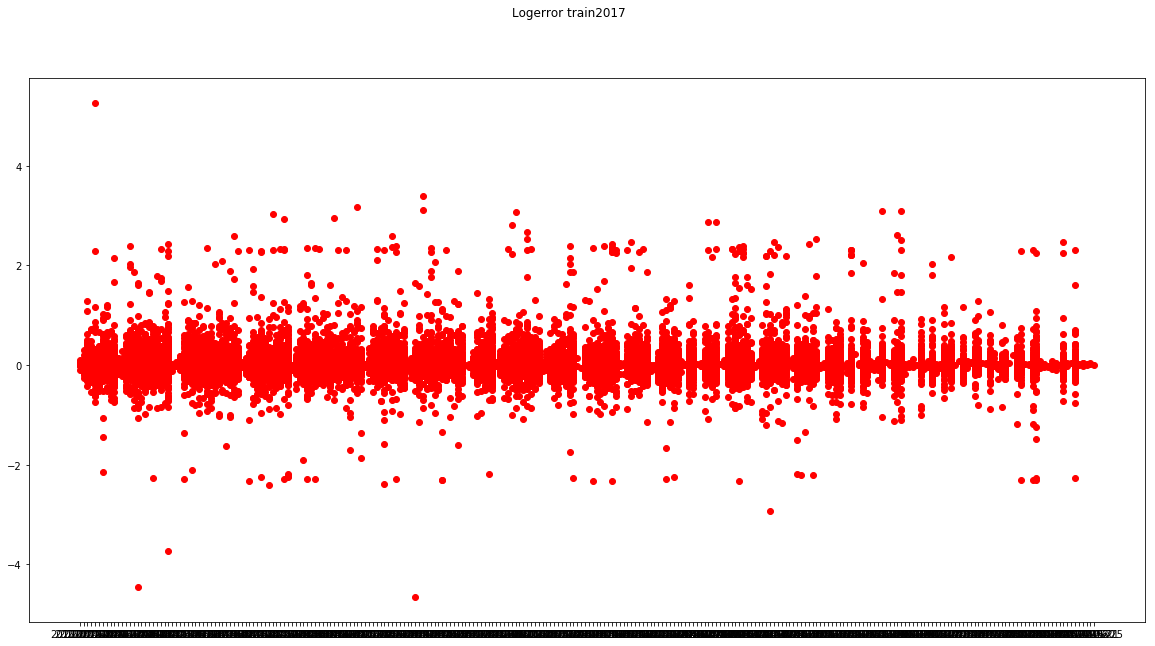

In [5]:
plt.figure(figsize=(20,10))
plt.plot(train17.transactiondate, train17.logerror, 'ro')
plt.suptitle('Logerror train2017')
plt.show()

Le logerror sur les biens vendus en 2017 ce situ entre -4.65 et 5.26 avec une moyenne de 0.0167, cependant le nuage de points ci-dessus nous indique la présence d'ouliers et remarque donc que le logerror se situ réellement entre environ -3 et +3   

In [6]:
train16= pd.read_csv('all/train_2016_v2.csv', sep=',', header='infer') 

In [7]:
train16.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
train16.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


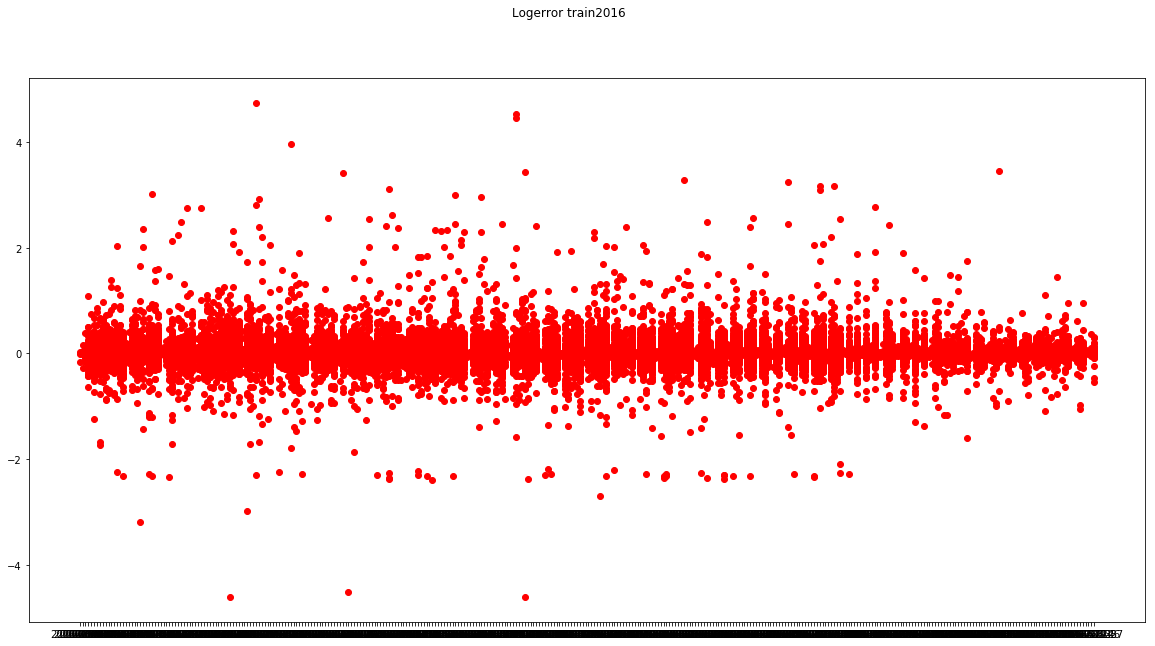

In [9]:
plt.figure(figsize=(20,10))
plt.plot(train16.transactiondate, train16.logerror, 'ro')
plt.suptitle('Logerror train2016')
plt.show()

La remarque pour les données 2016 est identique à celle de 2017, le logerror se situ entre -2.5 et +3 si on ne écarte les outliers  

On remarque que la valeur moyenne de du logerror est 0.011 ce qui est donc inférieur à celle observée en 2017, est-ce que cela signifit que l'algorythme de prédiction s'est dégradé entre 2016 et 2017 ? continuons l'inverstigation des données pour en savoir plus...Mais avant trançons le nuage de points des données 2017 et 2016 sur le même graphe

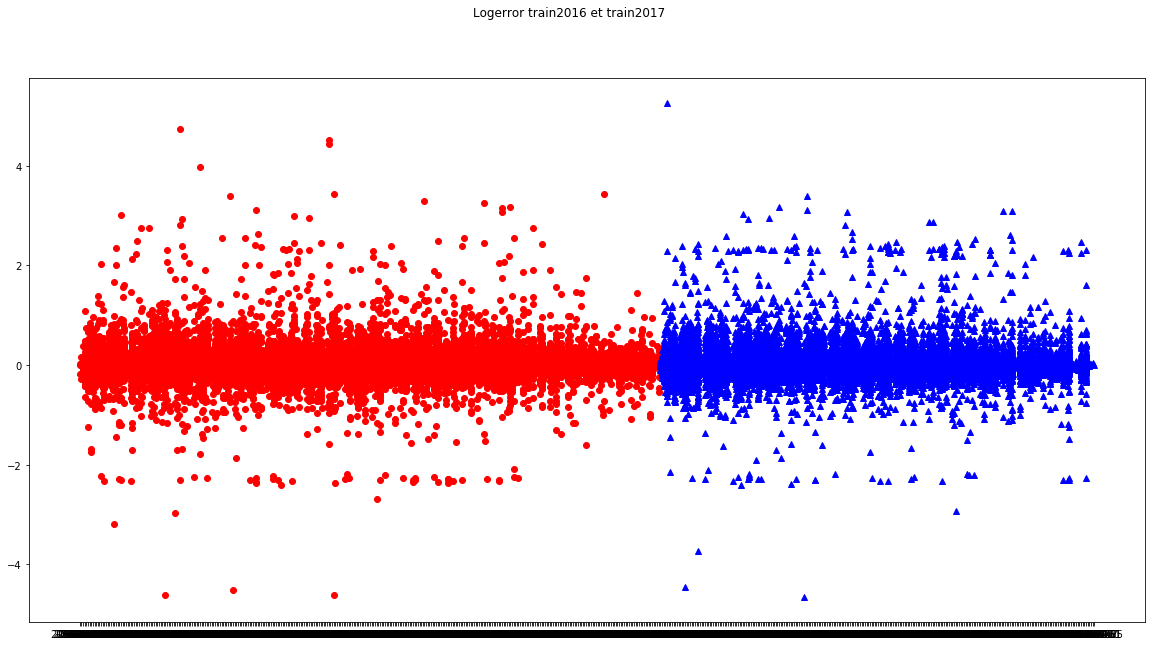

In [10]:
plt.figure(figsize=(20,10))
plt.plot(train16.transactiondate, train16.logerror, 'ro', train17.transactiondate, train17.logerror, 'b^')
plt.suptitle('Logerror train2016 et train2017')
plt.show()

# Concaténation des train17 et train16

In [11]:
TrainData = pd.concat([train17, train16])

In [12]:
TrainData.describe()

,parcelid,logerror
count,1.678880e+05,167888.000000
mean,1.299536e+07,0.013906
std,3.016071e+06,0.165706
min,1.071174e+07,-4.655420
25%,1.154899e+07,-0.025300
50%,1.254060e+07,0.006000
75%,1.421930e+07,0.039200
max,1.676893e+08,5.262999


In [16]:
mu, sigma = TrainData.logerror.mean(), TrainData.logerror.std()

In [17]:
print(mu, sigma)

0.013906306171241905 0.16570593701585143


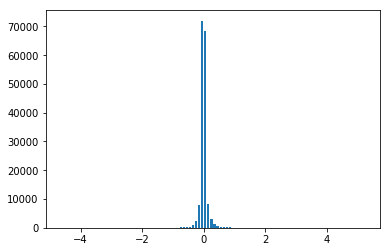

In [51]:
hist, bins = np.histogram(TrainData.logerror.values, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

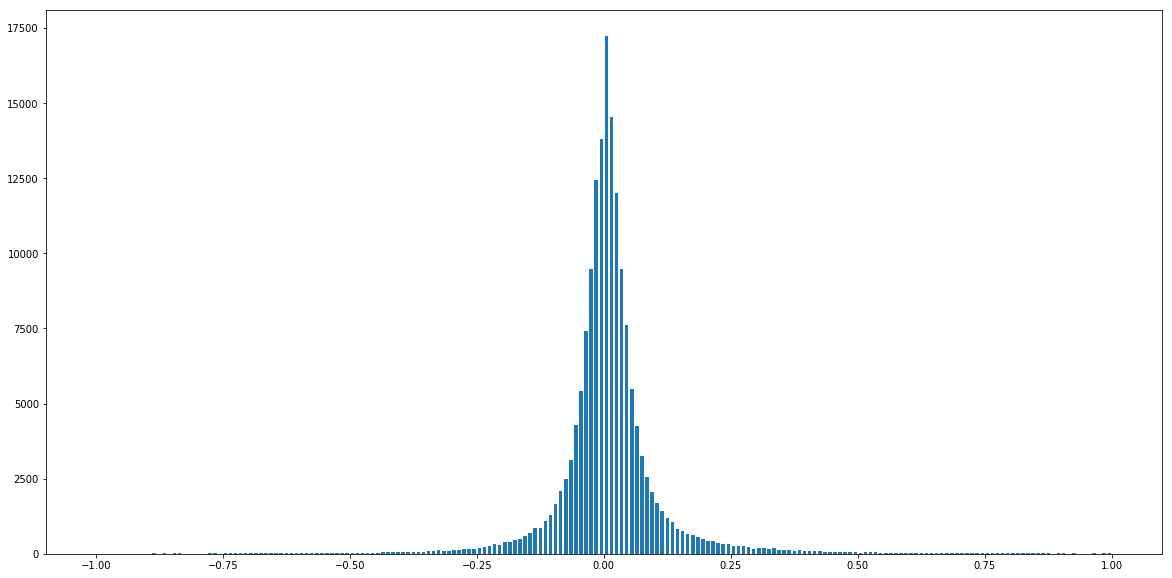

In [58]:
rangeMin,rangeMax = -1, 1
hist, bins = np.histogram(TrainData.logerror.values, bins=200, range=(rangeMin,rangeMax))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(20,10))
plt.bar(center, hist, align='center', width=width)
plt.show()

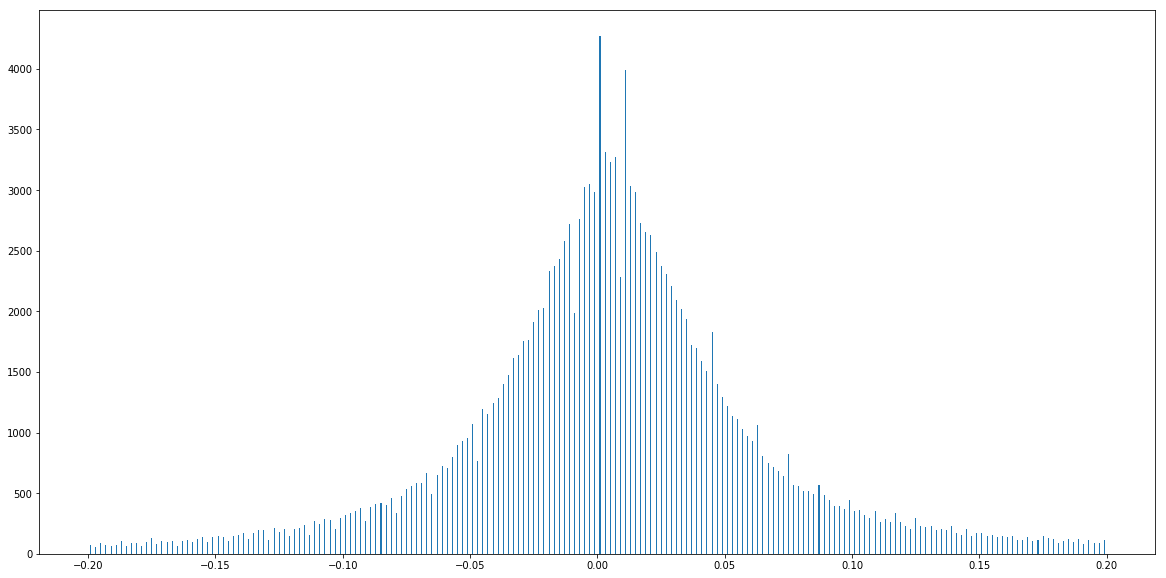

In [68]:
rangeMin,rangeMax = -0.2, 0.2
hist, bins = np.histogram(TrainData.logerror.values, bins=200, range=(rangeMin,rangeMax))
width = 0.2 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(20,10))
plt.bar(center, hist, align='center', width=width)
plt.show()

In [69]:
import seaborn as sns

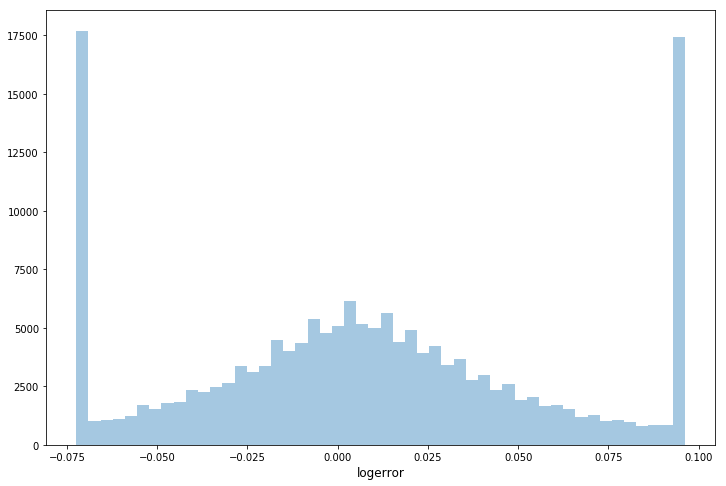

In [77]:
train_df = TrainData
# ulimit = np.percentile(train_df.logerror.values, 90)
# llimit = np.percentile(train_df.logerror.values, 10)
# train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
# train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [163]:
TrainData_uniqueIds = pd.concat([train16.parcelid, train17.parcelid])

In [166]:
TrainData_uniqueIds = TrainData_uniqueIds.drop_duplicates(keep='first', inplace=False)

In [167]:
TrainData_uniqueIds.count()

165210

In [116]:
TrainDataMerged = TrainDataMerged.rename(index=str, columns={
    "logerror_x":"logerror2016", 
    "logerror_y":"logerror2017",
    "transactiondate_x":"Tdates2016",
    "transactiondate_y":"Tdates2017",
})

In [155]:
TrainDataMerged

,parcelid,logerror2016,dates2016,logerror2017,dates2017
0,11016594,0.0276,2016-01-01,NaN,NaN
1,14366692,-0.1684,2016-01-01,0.002142,2017-08-04
2,12098116,-0.0040,2016-01-01,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN
5,11509835,-0.2705,2016-01-02,NaN,NaN
6,12286022,0.0440,2016-01-02,NaN,NaN
7,17177301,0.1638,2016-01-02,NaN,NaN
8,14739064,-0.0030,2016-01-02,NaN,NaN
9,14677559,0.0843,2016-01-03,NaN,NaN


In [118]:
TrainDataMerged.describe()

,parcelid,logerror2016,logerror2017
count,9.027700e+04,90277.000000,2359.000000
mean,1.298466e+07,0.011473,-0.043356
std,2.504486e+06,0.161118,0.207868
min,1.071174e+07,-4.605000,-2.300184
25%,1.155954e+07,-0.025300,-0.068136
50%,1.254734e+07,0.006000,-0.019913
75%,1.422755e+07,0.039200,0.011658
max,1.629608e+08,4.737000,2.375394


# Chargement des données de features

Dans cette étape nous allons charger les datasets decrivants les propriétés des biens. Nous disposons de 2 tableaux 2016 et 2017. 

Procedons d'abord au chargement des datasets en DF et par la suite à l'investigation des données.

In [78]:
X17= pd.read_csv('all/properties_2017.csv', sep=',', header='infer') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
X17.parcelid.count()

2985217

In [138]:
descX17 = X17.describe()

Nous allons à présent fusionner le dataset qui contient les 'features' X17 avec le dataframe 'TrainDataMerged' qui contient toutes les transactions et les logerrors sur 2016 et 2017

In [143]:
X17_train = pd.merge(X17, TrainDataMerged, on='parcelid')

In [145]:
X17_train.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror2016,dates2016,logerror2017,dates2017
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,2016.0,77893.0,2037.32,NaN,NaN,6.111002e+13,0.0953,2016-01-27,NaN,NaN
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,2016.0,97331.0,2622.76,NaN,NaN,6.111002e+13,0.0198,2016-03-30,0.016637,2017-04-19
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,2016.0,14450.0,615.90,NaN,NaN,6.111001e+13,0.0060,2016-05-27,NaN,NaN
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,2016.0,17568.0,714.16,NaN,NaN,6.111001e+13,-0.0566,2016-06-07,NaN,NaN
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2016.0,290000.0,6155.16,NaN,NaN,6.111001e+13,0.0573,2016-08-08,NaN,NaN


Le calcul des 'NaN' sur l'une des colonnes dates 

In [150]:
X17_train.logerror2016.count(None)

90277

In [122]:
X16 = pd.read_csv('all/properties_2016.csv', sep=',', header='infer') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
descX16 = X16.describe()

In [136]:
descX16

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [140]:
pd.merge(X16, , on='parcelid')

False

In [141]:
[

AttributeError: 'list' object has no attribute 'equals'